<center>
 <h1 style="color:black">PILWD-134K dataset EDA</h1> 
    </center>


<b> Libraries used in this file: </b>

<ul>
<li> pandas
<li> seaborn
<li> matplotlib.pyplot
</ul>
<p>
To Execute this file, you will need to download <i>PILWD-134k_phish.parquet </i>and <i>PILWD-134k_legit.parquet</i> from <a href = https://drive.google.com/drive/folders/1TYwUehoq4pFGYnvn8iXQqtSbS788mgLi><font size="+2">Here!</font></a>
    <br>(Don't forget to adjust the parquet file paths in the code)   
</p>
    

<a id='home' /> 
<h2> Content: </h2><br>
<a href=#phish><h3>1. Phishing Class Data Exploration</h3></a>
<ul>
    <li><a href=#1>1.1 Reading phish parquet file</a></li>
    <li><a href=#2>1.2 Missing Data</a></li>
    <li><a href=#3>1.3 Average Text Length</a></li>
    <li><a href=#4>1.4 Phish Brand Distribution</a></li>
    <li><a href=#5>1.5 Detected Text Languages</a></li>
    <li><a href=#6>1.6 SSL Distribution</a></li>
    <li><a href=#7>1.7 Top 10 TLD & Domains</a></li>
    <li><a href=#8>1.8 URL Length Stats</a></li>
    <li><a href=#9>1.9 Top 10 FLD & Subdomains</a></li>
</ul>

<a href=#legit><h3>2. Legitimate Class Data Exploration</h3></a>
<ul>
    <li><a href=#11>2.1 Reading legit parquet file</a></li>
    <li><a href=#22>2.2 Missing Data</a></li>
    <li><a href=#33>2.3 Average Text Length</a></li>
    <li><a href=#44>2.4 Legit Brand Distribution</a></li>
    <li><a href=#55>2.5 Detected Text Languages</a></li>
    <li><a href=#66>2.6 SSL Distribution</a></li>
    <li><a href=#77>2.7 Top 10 TLD & Domains</a></li>
    <li><a href=#88>2.8 URL Length Stats</a></li>
    <li><a href=#99>2.9 Top 10 FLD & Subdomains</a></li>
</ul>

<hr></hr>
<hr></hr>

  <a id='phish' /> 
  <center>
  <h3 id="phish-samples" style="color:red">1. Phish samples</h2>
    </center>

In [28]:
import pandas as pd

<a id='1' /> 
<h2>1.1 Reading Phish parquet file</h2>

In [29]:
%%time
phish_samples = pd.read_parquet('Z:\\parquet files\\PILWD-134k_phish.parquet')

CPU times: total: 19.3 s
Wall time: 17.6 s


In [30]:
phish_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66964 entries, 0 to 66963
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   dataset_name                 66964 non-null  object
 1   folder_name                  66964 non-null  object
 2   Class                        66964 non-null  object
 3   brand                        66964 non-null  object
 4   URL                          66964 non-null  object
 5   TLD                          66024 non-null  object
 6   Domain                       66024 non-null  object
 7   FLD                          66024 non-null  object
 8   Subdomain                    32391 non-null  object
 9   SSL                          66964 non-null  bool  
 10  image_path                   66964 non-null  object
 11  trafilatura_text             63650 non-null  object
 12  trafilatura_text_language    63203 non-null  object
 13  translated_bs_text           63

In [31]:
phish_samples.describe()

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
count,66964,66964,66964,66964,66964,66024,66024,66024,32391,66964,...,63650,63203,63698,63698,63431,66944,63832,63532,66964,66964
unique,1,66964,1,149,58046,721,30290,31074,14299,2,...,18030,43,24028,24328,43,36796,25553,22645,40976,27
top,PILWD134K,P000003_html.txt,phish,Other,http://cdn.byethost2.com/index.html,com,000webhostapp,000webhostapp.com,www,True,...,"To read the document, please choose your email...",English,\n\n\n\n\nOne Drive\n\n\n\n\n\n\n\n\n\n\n\n\n\...,\n\n\n\n\nOne Drive\n\n\n\n\n\n\n\n\n\n\n\n\n\...,English,\n *[v]: View this template\n *[t]: Discuss ...,\n \n \n \n \n One Drive\n\n ...,"One Drive\n\nTo read the document, please choo...","<html lang=""en""><head>\n <!-- Required meta...",English
freq,66964,1,66964,34748,22,35005,3949,3949,6733,50871,...,670,37836,579,579,37913,585,627,627,578,64490


In [32]:
# showing the first 10 samples in the dataframe
phish_samples.head(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
0,PILWD134K,P000003_html.txt,phish,unknown,https://formcrafts.com/a/maintainanceservivess,com,formcrafts,formcrafts.com,None,True,...,0\nStep\n1\nPrev\nNext\nPage 0\nIndex\nPage 1\...,English,\n\n\n\n\n\nZimbra::\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n\n\n\n\nZimbra::\n\n\n\n\n\n\n\n\n\n\n\n\n...,English,0\n\nStep 1\n\n__Prev\n\n__Next\n\nPage 0 __ I...,\n\n\t\t\n\t\t\n\t\t\n\t\t\n\n\t\t\n\t\t\t\t\t...,Zimbra::\n\n0\nStep 1\nPrev\nNext\nPage 0 Inde...,"<html style=""background-color: rgb(250, 250, 2...",English
1,PILWD134K,P000005_html.txt,phish,unknown,http://www.sniff4u.ru/,ru,sniff4u,sniff4u.ru,www,False,...,sEngine v0.001 SNIFF4U Войти Регистрация,Bulgarian,SENGINE V0.001\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSn...,\n\nsEngine v0.001\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,Bulgarian,\n\n# SNIFF4U\n\n__\n\n__\n\nВойти [Регистрац...,\n\t\n\tsEngine v0.001\n\t\n\t\n\t\n\n\t\n\t\n...,sEngine v0.001\n\nSNIFF4U\n\nВойти Регистрация,"<html lang=""en""><head>\n\t<meta charset=""UTF-8...",English
2,PILWD134K,P000015_html.txt,phish,unknown,http://cer.com.ua/.m/Subscribe/Almost2.html,com.ua,cer,cer.com.ua,None,False,...,Be the first to know about Emirates special of...,English,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,English,\n\n[Go to the Accessibility\npage](https://ww...,\n\n \n \n\n \n \n...,Subscribe to special offers | Emirates special...,"<html id=""mHtml"" class=""ek js flexbox flexboxl...",English
3,PILWD134K,P000016_html.txt,phish,unknown,http://cer.com.ua/.m/Subscribe/Survey.html?cro...,com.ua,cer,cer.com.ua,None,False,...,Emirates Airlines Survey Question Title * 1. A...,English,\n\nEmirates Airlines Survey\n\n\n\n\n\n\n\n\n...,\n\nEmirates Airlines Survey\n\n\n\n\n\n\n\n\n...,English,\n\n![](Survey_fichiers/b4a36b26-ca63-4204-aac...,\n\n Emirates Airlines Survey\n \n \n...,Emirates Airlines Survey\n\nEmirates Airlines ...,"<html lang=""zh-tw""><head>\n<meta http-equiv=""c...",English
4,PILWD134K,P000017_html.txt,phish,unknown,https://progaccsome.icu/fk/f2.php,icu,progaccsome,progaccsome.icu,None,True,...,Identyfikator użytkownika\nHasło z tokena\nHas...,Polish,IPKO website\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n\n\n\n\n\n\n\nSerwis internetowy iPKO\n\n\...,Polish,\n\n### ![\[logo iPKO biznes\]](Logowanie_fil...,\n \n \n \n\n\n#fkcnt {\n background: ...,Serwis internetowy iPKO\n\nIdentyfikator użytk...,"<html><head>\n <link rel=""SHORTCUT ICON"" hre...",English
5,PILWD134K,P000018_html.txt,phish,unknown,http://progaccsome.icu/fk/f2.php,icu,progaccsome,progaccsome.icu,None,False,...,Identyfikator użytkownika\nHasło z tokena\nHas...,Polish,IPKO website\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n\n\n\n\n\n\n\nSerwis internetowy iPKO\n\n\...,Polish,\n \n### ![\[logo iPKO biznes\]](Logowanie...,\n \n \n \n\n\n#fkcnt {\n background: ...,Serwis internetowy iPKO\n\nIdentyfikator użytk...,"<html><head>\n <link rel=""SHORTCUT ICON"" hre...",English
6,PILWD134K,P000020_html.txt,phish,unknown,http://bricks2.com/js/index.php,com,bricks2,bricks2.com,None,False,...,None,None,None,None,None,None,None,None,"<html><head><meta http-equiv=""Refresh"" content...",English
7,PILWD134K,P000021_html.txt,phish,unknown,http://www.timhewett.com/homesmes/index.html,com,timhewett,timhewett.com,www,False,...,None,None,None,None,None,None,\n\n\n\n\n/* deleted */\n\n\n\n\n\n\n\n\n\n\n\...,None,"<html><head><script language=""javascript"">docu...",English
8,PILWD134K,P000029_html.txt,phish,unknown,https://verif7-69ce7.firebaseapp.com/,firebaseapp.com,verif7-69ce7,verif7-69ce7.firebaseapp.com,verif7-69ce7,True,...,None,None,';d=unescape(m);document.write(d);,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,French,"\n \n![](data:image/png;base64,iVBORw0KGgoA...","\n\n\n\

In [33]:
# showing the last 10 samples in the dataframe
phish_samples.tail(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
66954,PILWD134K,P185983_html.txt,phish,Other,https://googletest.jontzeng.com/,com,jontzeng,jontzeng.com,googletest,True,...,Sign in\nUse your Google Account\nEmail or pho...,English,Sign in - Google AccountsSign inUse your Googl...,Sign in - Google AccountsSign inUse your Googl...,English,\n\n# Sign in\n\nUse your Google AccountEmail ...,body{opacity:0;}Sign in - Google Accounts@font...,Sign in - Google Accounts\n\nSign in\n\nUse yo...,"<html dir=""ltr"" class=""CMgTXc"" lang=""en""><head...",English
66955,PILWD134K,P185984_html.txt,phish,Other,https://office365-scion-287107.ue.r.appspot.com/,ue.r.appspot.com,office365-scion-287107,office365-scion-287107.ue.r.appspot.com,office365-scion-287107.ue.r,True,...,Sign in to your account Terms of use Privacy &...,English,\n\n\n\n\n\nSign in to your account\n\n\n\n\n\...,\n\n\n\n\n\nSign in to your account\n\n\n\n\n\...,English,![](img/ging.jpg) ![](img/drama.jpg) ![](img/d...,\n\n \n \n \n \n \n\nSign in to your acco...,Sign in to your account\n\nTerms of use Privac...,"<html lang=""en""><head>\n\n <meta charset=""utf...",English
66956,PILWD134K,P185986_html.txt,phish,Other,https://assalipur.com/tmp/nate/dub/,com,assalipur,assalipur.com,None,True,...,Amazon\nPlease Enable Cookies to Continue\nSig...,English,\n\nAmazon Sign In\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\nAmazon Sign In\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,English,_Amazon_\n\n#### Please Enable Cookies to Cont...,\n \n Amazon Sign In\n \n...,Amazon Sign In\n\nAmazon\n\nPlease Enable Cook...,"<html><head>\n <meta charset=""utf-8"">\n...",English
66957,PILWD134K,P185988_html.txt,phish,Other,https://empresas.juridicabr.com/a1b2c3/136989b...,com,juridicabr,juridicabr.com,empresas,True,...,Acesso com BB Code\nQual o seu meio de acesso?...,Portuguese,Auto Service Banco do Brasil\n\n\n\n © ...,\n\n\n\n\n\n\n\n\n\n\n\n\n\nAuto Atendimento B...,Portuguese,© Banco do Brasil ![](logo.png) Autoatendimen...,"@charset ""UTF-8"";[ng\:cloak],[ng-cloak],[data-...",Auto Atendimento Banco do Brasil\n\n© Banco do...,"<html><head><style type=""text/css"">@charset ""U...",English
66958,PILWD134K,P185991_html.txt,phish,Other,https://particulesgenerale.com/wp-admin/networ...,com,particulesgenerale,particulesgenerale.com,None,True,...,Obtenir vos codes\nLe code client vous est att...,French,Société Générale |Connection\n\nConnection - C...,\n\n\n\nSociété Générale | Connexion\n\nConnex...,French,![Société Générale \(se rendre à la page d’acc...,\n \n \n \n\n Société Générale | C...,Société Générale | Connexion\n\nConnexion - Es...,"<html class=""swm-root-active swm-mode-page"" la...",English
66959,PILWD134K,P185995_html.txt,phish,Other,https://www.netflix.verfiy-your-information.co...,com,verfiy-your-information,verfiy-your-information.com,www.netflix,True,...,Netflix\nSign In\nPlease enter a valid email a...,English,\n\n\n\nNetflix\n\n\n\n\n\n\n\n\n\n\n\n\nNetfl...,\n\n\n\nNetflix\n\n\n\n\n\n\n\n\n\n\n\n\nNetfl...,English,![](assets/background.jpg) Netflix\n\n# Sign I...,\n \n \n \n Netfli...,Netflix\n\nNetflix\n\nSign In\n\nPlease enter ...,"<html lang=""en""><head>\n <meta http-equ...",English
66960,PILWD134K,P185996_html.txt,phish,Other,https://skywingstoursandtravels.com/sharepoint...,com,skywingstoursandtravels,skywingstoursandtravels.com,None,True,...,Sign in to your Microsoft account,English,\nSign in to your Microsoft account\n\n\n\n\n\...,\nSign in to your Microsoft account\n\n\n\n\n\...,English,![](images/1.png)\n\n *[v]: View this templat...,\nSign in to your Microsoft account\n \n \n\...,Sign in to your Microsoft account,<html><head>\n<title>Sign in to your Microsoft...,English
66961,PILWD134K,P185997_html.txt,phish,Other,https://secure249.inmotionhosting.com/~myawao5...,com,inmotionhosting,inmo

<hr></hr>

<a id='2' /> 
<h2>1.2 Missing Data</h2>

In [34]:
print('the number of missing HTML files (phish):', sum(phish_samples.full_html.isnull()))
print('the number of missing URLs (phish):', sum(phish_samples.URL.isnull()))
print('the number of missing images (phish):', sum(phish_samples.image_path.isnull()))

the number of missing HTML files (phish): 0
the number of missing URLs (phish): 0
the number of missing images (phish): 0


<hr></hr>

<a id='3' /> 
<h2>1.3 Average Text Length</h2>

In [35]:
print('the average phish HTML code text length:', round(phish_samples.full_html.str.len().sum() / sum(phish_samples.full_html.notnull()), 1))
print('the average phish trafilatura text length:', round((phish_samples.trafilatura_text.str.len().sum() / sum(phish_samples.trafilatura_text.notnull())),1))
print('the average phish BeautifulSoup text length:', round(phish_samples.BeautifulSoup_text.str.len().sum() / sum(phish_samples.html_extract_text.notnull()), 1))
# print('the average phish html2text text length:', round(phish_samples.html2text_text.str.len().sum() / sum(phish_samples.html2text_text.notnull()), 1))
# print('the average phish html_extract text length:', round(phish_samples.html_extract_text.str.len().sum() / sum(phish_samples.html_extract_text.notnull()), 1))
# print('the average phish lxml_text text length:', round(phish_samples.lxml_text.str.len().sum() / sum(phish_samples.lxml_text.notnull()), 1))



the average phish HTML code text length: 68495.9
the average phish trafilatura text length: 748.3
the average phish BeautifulSoup text length: 2610.5


<hr></hr>

<a id='4' /> 
<h2>1.4 Phish Brand Distribution</h2>


In [36]:
phish_samples.brand.value_counts()

Other            34748
unknown          24224
Facebook          1675
Steam              741
PayPal             687
                 ...  
ZML                  1
Nordea Bank          1
Zynga                1
Discover Card        1
Sky Financial        1
Name: brand, Length: 149, dtype: int64

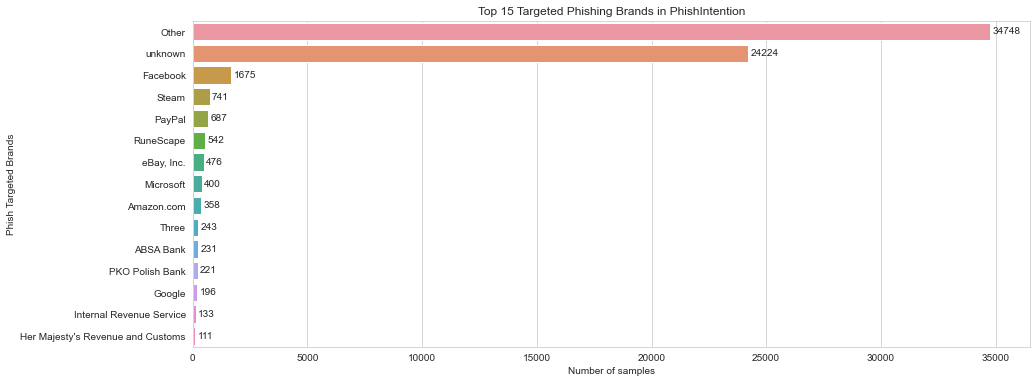

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

brands = phish_samples.brand.value_counts()[:15].index
values = phish_samples.brand.value_counts()[:15].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=brands, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Phish Targeted Brands')
plt.title("Top 15 Targeted Phishing Brands in PhishIntention")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

<hr></hr>

<a id='5' /> 
<h2>1.5 Detected Text Languages</h2>

In [38]:
trafilatura_langs_phish = phish_samples.trafilatura_text_language.value_counts()

# top 10 languages detected in trafilatura text
trafilatura_langs_phish[:10]

English               37836
Portuguese             5937
Spanish; Castilian     5105
German                 2157
Japanese               1949
French                 1947
Russian                1654
Italian                1301
Polish                 1187
Catalan; Valencian      537
Name: trafilatura_text_language, dtype: int64

In [39]:
print('The total number of phish languages (trafilatura): ', len(trafilatura_langs_phish))

The total number of phish languages (trafilatura):  43


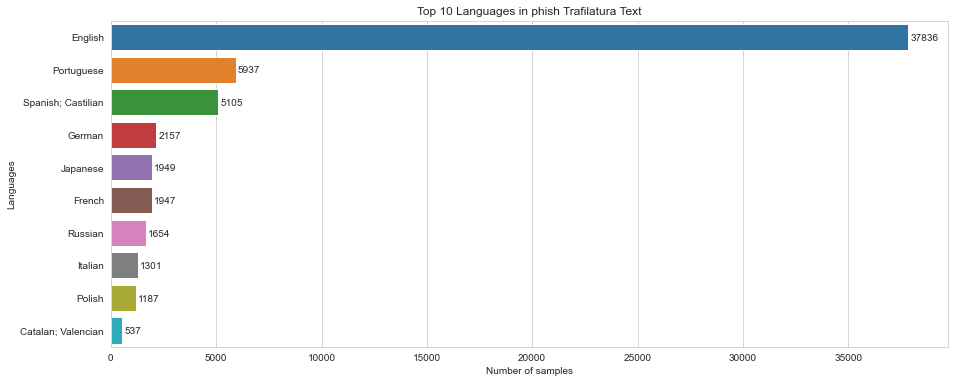

In [40]:
langs = trafilatura_langs_phish[:10].index
values = trafilatura_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish Trafilatura Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

In [41]:
BeautifulSoup_langs_phish = phish_samples.BeautifulSoup_text_language.value_counts()

# top 10 languages detected in BeautifulSoup text
BeautifulSoup_langs_phish[:10]

English               37913
Portuguese             6202
Spanish; Castilian     4778
German                 2539
French                 2071
Japanese               1951
Russian                1691
Italian                1325
Polish                 1221
Dutch; Flemish          468
Name: BeautifulSoup_text_language, dtype: int64

In [42]:
print('The total number of phish languages (BS): ', len(BeautifulSoup_langs_phish))

The total number of phish languages (BS):  43


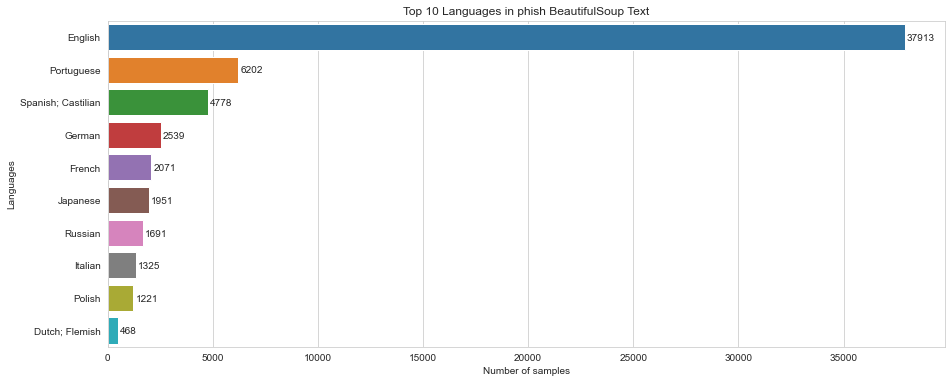

In [43]:
langs = BeautifulSoup_langs_phish[:10].index
values = BeautifulSoup_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish BeautifulSoup Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


In [44]:
html_langs_phish = phish_samples.html_text_language.value_counts()

# top 10 languages detected in html text
html_langs_phish[:10]

English               64490
Catalan; Valencian      674
Welsh                   481
Portuguese              209
Croatian                170
French                  162
Spanish; Castilian      156
Japanese                139
Somali                   71
Polish                   61
Name: html_text_language, dtype: int64

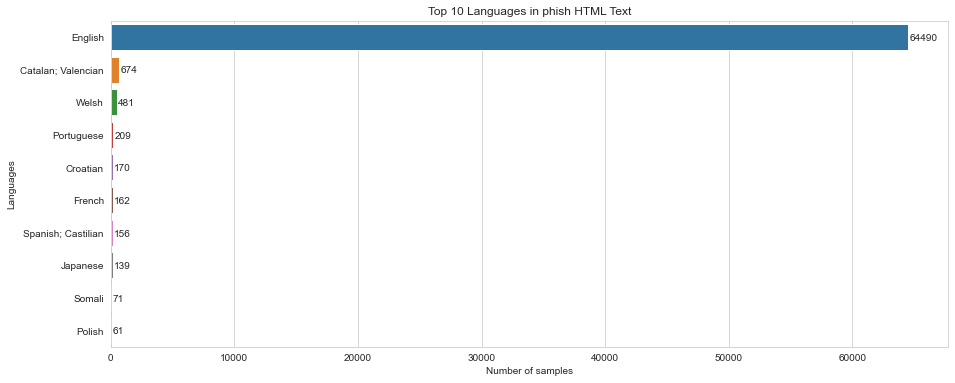

In [45]:
langs = html_langs_phish[:10].index
values = html_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish HTML Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


<hr></hr>

<a id='6' /> 
<h2>1.6 SSL Distribution</h2>

In [46]:
phish_samples.SSL.value_counts()

True     50871
False    16093
Name: SSL, dtype: int64

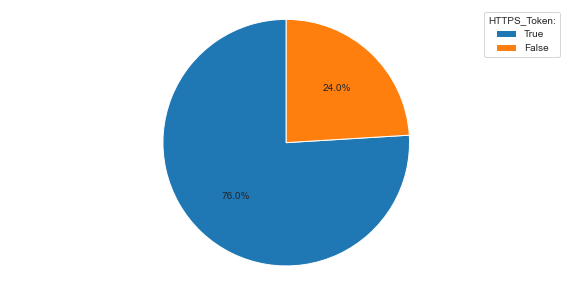

In [47]:
sizes = phish_samples.SSL.value_counts().values 
labels= phish_samples.SSL.value_counts().index 
fig=plt.figure(figsize=(10, 5))
plt.pie(sizes, startangle = 90, autopct = '%1.1f%%')
plt.legend(labels, title = 'HTTPS_Token:')
plt.axis('equal')

plt.show()

<hr></hr>

<a id='7' /> 
<h2>1.7 Top 10 TLD & Domains</h2>

In [48]:
phish_samples.Domain.value_counts()[:10]

000webhostapp      3949
weebly             1367
google              965
umbler              418
firebasestorage     382
webnode             381
storage             346
16mb                294
godaddysites        290
webcindario         289
Name: Domain, dtype: int64

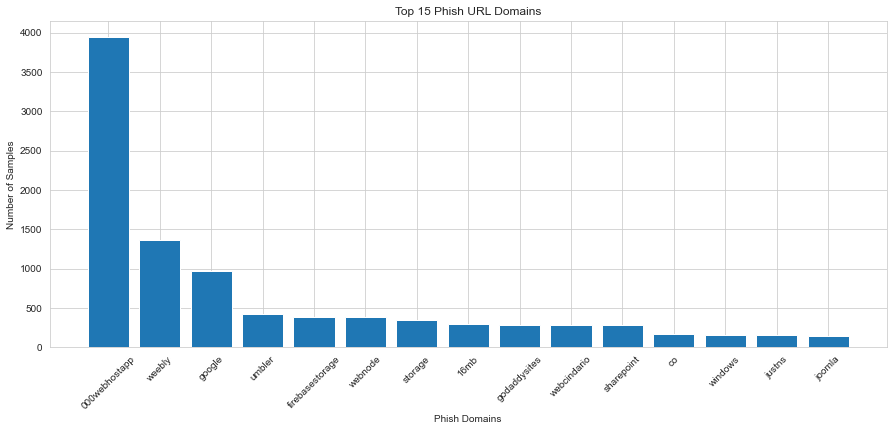

In [49]:
domains = phish_samples.Domain.value_counts()[:15].index
counts = phish_samples.Domain.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(domains, counts)

# Add labels and title
plt.xlabel("Phish Domains")
plt.ylabel("Number of Samples")
plt.title("Top 15 Phish URL Domains")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [50]:
phish_samples.TLD.value_counts()[:10]

com               35005
net                2226
xyz                1496
ru                 1454
org                1396
com.br             1212
top                 809
googleapis.com      728
info                710
co.uk               549
Name: TLD, dtype: int64

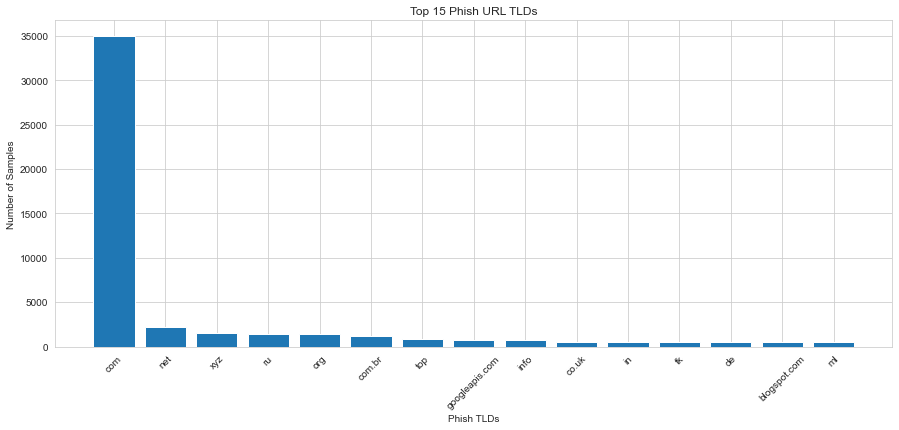

In [51]:
tlds = phish_samples.TLD.value_counts()[:15].index
counts = phish_samples.TLD.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(tlds, counts)

# Add labels and title
plt.xlabel("Phish TLDs")
plt.ylabel("Number of Samples")
plt.title("Top 15 Phish URL TLDs")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<hr></hr>

<a id='8' /> 
<h2>1.8 URL Length Stats</h2>

In [52]:
print('Phish URL average length:', round(phish_samples.URL.str.len().sum()/sum(phish_samples.URL.notnull()), 4))
print('Phish URL min length:', phish_samples.URL.str.len().min())
print('Phish URL max length:', phish_samples.URL.str.len().max())
print('Phish URL median length:', phish_samples.URL.str.len().median())

Phish URL average length: 84.9008
Phish URL min length: 14
Phish URL max length: 8388
Phish URL median length: 57.0


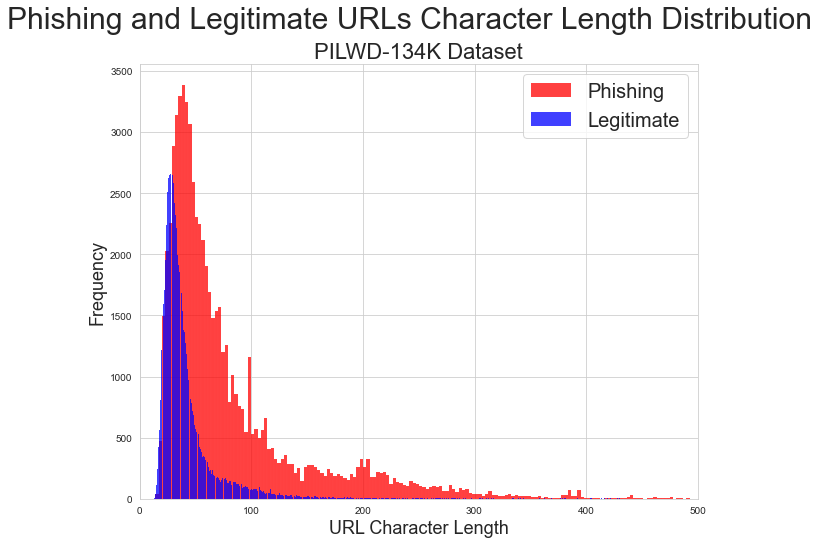

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

phish_samples['url_length'] = phish_samples.URL.str.len()
legit_samples['url_length'] = legit_samples.URL.str.len()

# Create a single subplot for VanNL126k
fig, ax = plt.subplots(figsize=(10, 8))

# Plot phishing dataset
sns.histplot(phish_samples['url_length'], color="red", label="Phishing", ax=ax)

# Plot legitimate dataset on top of phishing
sns.histplot(legit_samples['url_length'], color="blue", label="Legitimate", ax=ax)

title_fontsize = 22

# Set the title and axis labels for the subplot
ax.set_title('PILWD-134K Dataset', fontsize=title_fontsize)
ax.set_xlabel('URL Character Length', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)

# Set the x-axis limit to 0-800 or adjust as needed
ax.set_xlim(0, 500)

# Add a legend to the subplot
ax.legend(fontsize=20)

# Set the main title
plt.suptitle("Phishing and Legitimate URLs Character Length Distribution", fontsize=30)

plt.show()


<hr></hr>

<a id='9' /> 
<h2>1.9 Top 10 FLD & Subdomains</h2>

In [54]:
phish_samples.iloc[:, 4:9].head(10)

,URL,TLD,Domain,FLD,Subdomain
0,https://formcrafts.com/a/maintainanceservivess,com,formcrafts,formcrafts.com,None
1,http://www.sniff4u.ru/,ru,sniff4u,sniff4u.ru,www
2,http://cer.com.ua/.m/Subscribe/Almost2.html,com.ua,cer,cer.com.ua,None
3,http://cer.com.ua/.m/Subscribe/Survey.html?cro...,com.ua,cer,cer.com.ua,None
4,https://progaccsome.icu/fk/f2.php,icu,progaccsome,progaccsome.icu,None
5,http://progaccsome.icu/fk/f2.php,icu,progaccsome,progaccsome.icu,None
6,http://bricks2.com/js/index.php,com,bricks2,bricks2.com,None
7,http://www.timhewett.com/homesmes/index.html,com,timhewett,timhewett.com,www
8,https://verif7-69ce7.firebaseapp.com/,firebaseapp.com,verif7-69ce7,verif7-69ce7.firebaseapp.com,verif7-69ce7
9,https://www.confidenttries.com/survey/2732no/s...,com,confidenttries,confidenttries.com,www


In [55]:
print('the number of unique flds:', len(phish_samples.FLD.unique()))
phish_samples.FLD.value_counts()[:20]

the number of unique flds: 31075


000webhostapp.com                 3949
weebly.com                        1367
google.com                         956
umbler.net                         418
firebasestorage.googleapis.com     382
storage.googleapis.com             346
webnode.com                        305
16mb.com                           294
godaddysites.com                   290
webcindario.com                    288
sharepoint.com                     284
co.vu                              164
windows.net                        159
justns.ru                          154
joomla.com                         147
typeform.com                       127
preview-domain.com                 106
secureserver.net                    89
gamingweb.de                        85
weblium.site                        82
Name: FLD, dtype: int64

In [56]:
print('the number of unique subdomains:', len(phish_samples.Subdomain.unique()))
phish_samples.Subdomain.value_counts()[:20]

the number of unique subdomains: 14300


www                             6733
docs                             892
firebasestorage                  382
storage                          344
secure.runescape                 293
mail                             195
rakuten.co.jp                    118
services.runescape               115
paypal.co.uk                     114
www.amazon.co.jp                  99
paypal                            86
amazon.co.jp                      81
secure                            73
forms                             71
xn--sparkass-i1a                  69
blog                              59
bcpzonasegurabeta.viabcp.com      58
app                               57
itau                              57
oldschool.secure                  56
Name: Subdomain, dtype: int64

In [57]:
phish_samples.iloc[:, 4:9].describe()

,URL,TLD,Domain,FLD,Subdomain
count,66964,66024,66024,66024,32391
unique,58046,721,30290,31074,14299
top,http://cdn.byethost2.com/index.html,com,000webhostapp,000webhostapp.com,www
freq,22,35005,3949,3949,6733


<hr></hr>

<hr></hr>

<a id='legit' /> 
<center>
  <h2 id="legit-samples" style="color:red">2. Legit samples</h2>
</center>


<a id='11' /> 
<h2>2.1 Reading Legit parquet file</h2>


In [58]:
%%time
legit_samples = pd.read_parquet('Z:\\parquet files\\PILWD-134k_legit.parquet')

CPU times: total: 1min 13s
Wall time: 2min 39s


In [59]:
legit_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66964 entries, 0 to 66963
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   dataset_name                 66964 non-null  object
 1   folder_name                  66964 non-null  object
 2   Class                        66964 non-null  object
 3   brand                        66964 non-null  object
 4   URL                          66964 non-null  object
 5   TLD                          66946 non-null  object
 6   Domain                       66946 non-null  object
 7   FLD                          66946 non-null  object
 8   Subdomain                    45313 non-null  object
 9   SSL                          66964 non-null  bool  
 10  image_path                   66953 non-null  object
 11  trafilatura_text             66885 non-null  object
 12  trafilatura_text_language    65674 non-null  object
 13  translated_bs_text           66

In [60]:
legit_samples.head(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
0,PILWD134K,L000000_html.txt,legit,unknown,https://www.google.com/?gws_rd=ssl,com,google,google.com,www,True,...,Gmail\nImágenes\nCuenta\nBúsqueda\nMaps\nYouTu...,Spanish; Castilian,Google gmailimágégégosCuentabúsquedamapSyUtube...,Google GmailImágenesCuentaBúsquedaMapsYouT...,Spanish; Castilian,[Gmail](https://mail.google.com/mail/?tab=wm0&...,Google@-moz-keyframes gb__a{0%{opacity:0}50%{o...,Google\n\nGmail\nImágenes\n\nCuenta\nBúsqueda\...,"<html itemscope="""" itemtype=""http://schema.org...",English
1,PILWD134K,L000001_html.txt,legit,unknown,https://www.yelp.es/madrid,es,yelp,yelp.es,www,True,...,Al ladito de casa y casi tengo que pasar mucha...,Spanish; Castilian,"\n\n\n\n\n\nRestaurantes, dentistas, bares, sa...","\n\n\n\n\n\nRestaurantes, dentistas, bares, sa...",Spanish; Castilian,B5F422B6-2841-451D-8211-E654F05FB4F0983D32A5-B...,\n \n\n \n \n\n \n...,"Restaurantes, dentistas, bares, salones de bel...","<html class=""js"" lang=""es_ES""><!--<![endif]-->...",English
2,PILWD134K,L000002_html.txt,legit,unknown,https://www.fandom.com/,com,fandom,fandom.com,www,True,...,FANDOM and our partners use technology such as...,English,\n\nFANDOM\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\nFANDOM\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,English,\n\n[ ](https://www.fandom.com)\n\n[ Games ](h...,\n\t\t\n\t\t\nFANDOM\n\n\n\n\t\t\n\t\t\n\n\n\n...,FANDOM\n\nGames Movies TV Video\nWikis\n\nExpl...,"<html prefix=""og: http://ogp.me/ns#"" class=""de...",English
3,PILWD134K,L000004_html.txt,legit,unknown,https://www.msn.com/es-es/,com,msn,msn.com,www,True,...,Navegación por los portales\nObtén tu correo a...,Spanish; Castilian,"\n\n\n\n \n Hotmail, Outlook, noticias y horós...","\n\n\n\n \n Hotmail, Outlook, noticias y horós...",Spanish; Castilian,![image\nbeacon](https://web.vortex.data.msn.c...,\n \n\t\t\n\n \n\n\n\n \n\n\n ...,"Hotmail, Outlook, noticias y horóscopo en MSN ...","<html prefix=""og: http://ogp.me/ns# fb: http:/...",Catalan; Valencian
4,PILWD134K,L000005_html.txt,legit,unknown,https://www.medicalnewstoday.com/,com,medicalnewstoday,medicalnewstoday.com,www,True,...,You have chosen to share the following article...,English,\n\nHealth News - Medical News Today\n\n\n\n\n...,\n\nHealth News - Medical News Today\n\n\n\n\n...,English,"\n\nFor full functionality, it is necessary to...",\n\n\nHealth News - Medical News Today\n\n\n\n...,Health News - Medical News Today\n\nFor full f...,"<html class="" async-hide gecko linux js"" lang=...",English
5,PILWD134K,L000006_html.txt,legit,unknown,https://quizlet.com/,com,quizlet,quizlet.com,None,True,...,Over 90% of students who use Quizlet report hi...,English,"Learning tools & flashcards, for free | Quizle...","Learning tools & flashcards, for free | Quizle...",English,\n\n\n\n[](/)\n\nSearch\n\n[Create](https://qu...,"Learning tools & flashcards, for free | Quizle...","Learning tools & flashcards, for free | Quizle...","<html class=""firefox cursor"" lang=""en-us""><hea...",English
6,PILWD134K,L000007_html.txt,legit,unknown,https://www.urbandictionary.com/,com,urbandictionary,urbandictionary.com,www,True,...,"Someone who has the same phone number as you, ...",English,"Urban Dictionary, August 5: number neighbor\n\...","Urban Dictionary, August 5: number neighbor\n\...",English,\n\nUrban Dictionary and our advertising partn...,"Urban Dictionary, August 5: number neighbor.cc...","Urban Dictionary, August 5: number neighbor\n\...","<html prefix=""og: http://ogp.me/ns#"" lang=""en-...",English
7,PILWD134K,L000008_html.txt,legit,unknown,https://giphy.com/,com,giphy,giphy.com,None,True,...,Reactions\nEntertainment\nSports\nStickers\nAr...,English,\n\n\n\n\n\nGIPHY | Search All the GIFs & Make...,\n\n\n\n\n\nGIPHY | Search All the GIFs & Make...,E

In [61]:
legit_samples.tail(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
66954,PILWD134K,LL060989_html.txt,legit,unknown,https://www.gforgames.com/,com,gforgames,gforgames.com,www,True,...,Home\nAndroid\nGames\nGadgets\nSign in\nWelcom...,English,\nHome - g For Games\n\n\n\n\n\n\n\n\n\n\n\n\n...,\nHome - g For Games\n\n\n\n\n\n\n\n\n\n\n\n\n...,English,\n\n__\n\n__\n\n * [Home](https://www.gforgam...,\n Home - g For Games\n \n \n \n ...,Home - g For Games\n\nHome\nAndroid\nGames\nGa...,"<html class="" td-md-is-os-x td-md-is-firefox"" ...",English
66955,PILWD134K,LL060990_html.txt,legit,unknown,https://www.enec.com/login.php?s=2&case=3,com,enec,enec.com,www,True,...,User ID\nPassword\nSIGN IN\nPlease sign in wit...,English,\nCreate account\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\nCreate account\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,English,\n\n![](./templates/img/header_print_2.jpg)\n\...,\nCreate account\n\n\n\n\n\n\n \n\n \n\n\n\n\n...,Create account\n\nEnter reserved areas\n\nUser...,"<html xmlns=""http://www.w3.org/1999/xhtml""><he...",English
66956,PILWD134K,LL060992_html.txt,legit,unknown,http://lawchong.com/index.php?mid=Home&act=dis...,com,lawchong,lawchong.com,None,False,...,* Legal Document Assistant는 변호사가 아닙니다. 그러므로 법적...,English,\n\n\n\n\n\n\nHOME\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n\n\n\n\n\nHOME\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,English,\n\n * [Sign In](/index.php?mid=Home&act=disp...,\n\n\n\n\n\n\nHOME\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,HOME\n\nSign In\nSign Up\n\nHOME\nLegal Docume...,"<html style="""" class="" modernizr-js modernizr-...",English
66957,PILWD134K,LL060993_html.txt,legit,unknown,https://www.goturkey.com/,com,goturkey,goturkey.com,www,True,...,Explore Turkey region to region! Every region ...,English,GoTurkey - Official Travel Guide of TurkeyDest...,GoTurkey - Official Travel Guide of TurkeyDest...,English,\n\n[](/)\n\n[Destinations](/destinations)[Att...,GoTurkey - Official Travel Guide of TurkeyDest...,GoTurkey - Official Travel Guide of Turkey\n\n...,"<html class=""js no-touch desktop firefox 79"" l...",English
66958,PILWD134K,LL060994_html.txt,legit,unknown,https://www.uaa.mx/portal/,mx,uaa,uaa.mx,www,True,...,¿Te interesa conocer más sobre la UAA? Encuent...,Spanish; Castilian,\nUAA | Universidad Autónoma de Aguascalientes...,\nUAA | Universidad Autónoma de Aguascalientes...,Spanish; Castilian,\n\n____\n\n# [Universidad Autónoma de Aguasca...,\n\nUAA | Universidad Autónoma de Aguascalient...,UAA | Universidad Autónoma de Aguascalientes\n...,"<html lang=""en""><head>\n\n<title>UAA | Univers...",English
66959,PILWD134K,LL060995_html.txt,legit,unknown,https://honmagolf-ec.com/mypage/login,com,honmagolf-ec,honmagolf-ec.com,None,True,...,"10,000円以上のお買い物で送料無料に！\n0\n次回から自動的にログインする\nログイン...",Japanese,My Page/Login | Homma Golf Japan Official Site...,\n\n\n\n\n\nMYページ/ログイン | 本間ゴルフ日本公式サイト\n\n\n\n\...,Japanese,"\n\n10,000円以上のお買い物で送料無料に！\n\n * [ご利用規約](https...",\n\n\n\n\n\n\n\nMYページ/ログイン | 本間ゴルフ日本公式サイト\n\n ...,"MYページ/ログイン | 本間ゴルフ日本公式サイト\n\n10,000円以上のお買い物で送料...","<html lang=""ja""><head>\n<meta charset=""utf-8"">...",English
66960,PILWD134K,LL060996_html.txt,legit,unknown,http://clutchbrakeforum.com/ucp.php?mode=login...,com,clutchbrakeforum,clutchbrakeforum.com,None,False,...,Register\nIn order to login you must be regist...,English,\n\n\n\nClutchBrakeForum.com - User Control Pa...,\n\n\n\nClutchBrakeForum.com - User Control Pa...,English,\n\n__\n\n * [__Board index](./index.php)\n ...,\n\n\n\n\nClutchBrakeForum.com - User Control ...,ClutchBrakeForum.com - User Control Panel - Lo...,"<html dir=""ltr"" lang=""en-gb""><head>\n<meta cha...",English
66961,PILWD134K,LL060997_html.txt,legit,unknown,https://www.2d-3d.ru/,ru,2d-3d,2d-3d.ru,www,True,...,"База готовых чертежей, рабочих, курсовых и дип...",Russian,\n\n\n\nЧертежи dwg проекты Autocad Комп

In [62]:
legit_samples.describe()

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
count,66964,66964,66964,66964,66964,66946,66946,66946,45313,66964,...,66885,65674,66887,66887,65588,66964,66907,66888,66933,66933
unique,1,66964,1,1,66447,505,61184,61989,2187,2,...,63242,50,66056,66076,49,66742,66136,65954,66531,30
top,PILWD134K,L000000_html.txt,legit,unknown,https://www.varsitytutors.com/login,com,force,force.com,www,True,...,404 Not Found Not Found The requested URL /sig...,English,\n404 Not Found\n\nNot Found\nThe requested UR...,\n404 Not Found\n\nNot Found\nThe requested UR...,English,"\n\n# Page Not Found\n\nSorry, but the page yo...",\n404 Not Found\n\nNot Found\nThe requested UR...,404 Not Found\n\nNot Found\n\nThe requested UR...,<html><head>\n<title>404 Not Found</title>\n</...,English
freq,66964,1,66964,66964,3,47611,39,39,38298,57670,...,95,56188,95,95,56296,8,95,95,74,66334


<hr></hr>

<a id='22' /> 
<h2>2.2 Missing Data</h2>

In [63]:
print('the number of missing HTML files (legit):', sum(legit_samples.full_html.isnull()))
print('the number of missing URLs (legit):', sum(legit_samples.URL.isnull()))
print('the number of missing images (legit):', sum(legit_samples.image_path.isnull()))

the number of missing HTML files (legit): 31
the number of missing URLs (legit): 0
the number of missing images (legit): 11


<hr></hr>

<a id='33' /> 
<h2>2.3 Average Text Length</h2>

In [64]:
print('the average legit HTML code text length:', round(legit_samples.full_html.str.len().sum() / sum(legit_samples.full_html.notnull()), 1))
print('the average legit trafilatura text length:', round((legit_samples.trafilatura_text.str.len().sum() / sum(legit_samples.trafilatura_text.notnull())),1))
print('the average legit BeautifulSoup text length:', round(legit_samples.BeautifulSoup_text.str.len().sum() / sum(legit_samples.html_extract_text.notnull()), 1))
# print('the average legit html2text text length:', round(legit_samples.html2text_text.str.len().sum() / sum(legit_samples.html2text_text.notnull()), 1))
# print('the average legit html_extract text length:', round(legit_samples.html_extract_text.str.len().sum() / sum(legit_samples.html_extract_text.notnull()), 1))
# print('the average legit lxml_text text length:', round(legit_samples.lxml_text.str.len().sum() / sum(legit_samples.lxml_text.notnull()), 1))


the average legit HTML code text length: 151911.2
the average legit trafilatura text length: 1860.1
the average legit BeautifulSoup text length: 7006.1


<hr></hr>

<a id='44' /> 
<h2>2.4 Legit Brand Distribution</h2>

In [65]:
#there are no legitimate brand data
legit_samples.brand.value_counts()

unknown    66964
Name: brand, dtype: int64

<hr></hr>

<a id='55' /> 
<h2>2.5 Detected Text Languages</h2>

In [66]:
trafilatura_langs_legit = legit_samples.trafilatura_text_language.value_counts()

# top 10 languages detected in trafilatura text
trafilatura_langs_legit[:10]

English               56188
Spanish; Castilian     3057
Russian                1639
German                  817
French                  556
Korean                  497
Japanese                330
Portuguese              302
Italian                 270
Polish                  233
Name: trafilatura_text_language, dtype: int64

In [67]:
print('The total number of phish languages (trafilatura): ', len(trafilatura_langs_legit))

The total number of phish languages (trafilatura):  50


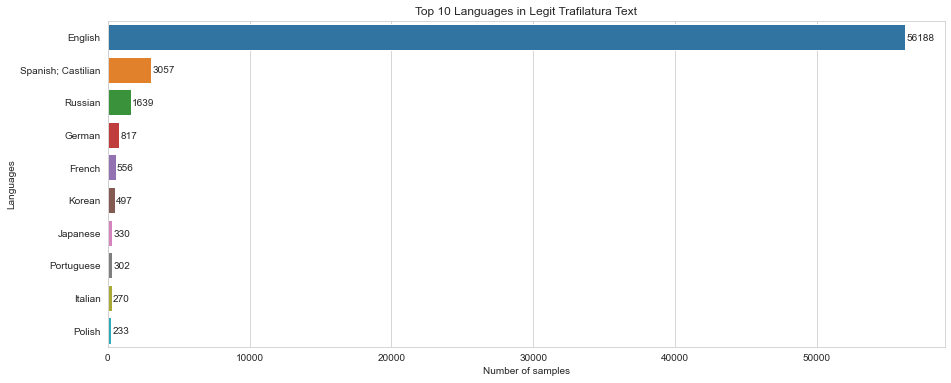

In [68]:
langs = trafilatura_langs_legit[:10].index
values = trafilatura_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit Trafilatura Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

In [69]:
BeautifulSoup_langs_legit = legit_samples.BeautifulSoup_text_language.value_counts()

# top 10 languages detected in BeautifulSoup text
BeautifulSoup_langs_legit[:10]

English               56296
Spanish; Castilian     3006
Russian                1647
German                  786
French                  548
Korean                  510
Japanese                330
Portuguese              292
Italian                 264
Polish                  232
Name: BeautifulSoup_text_language, dtype: int64

In [70]:
print('The total number of phish languages (BS): ', len(BeautifulSoup_langs_legit))

The total number of phish languages (BS):  49


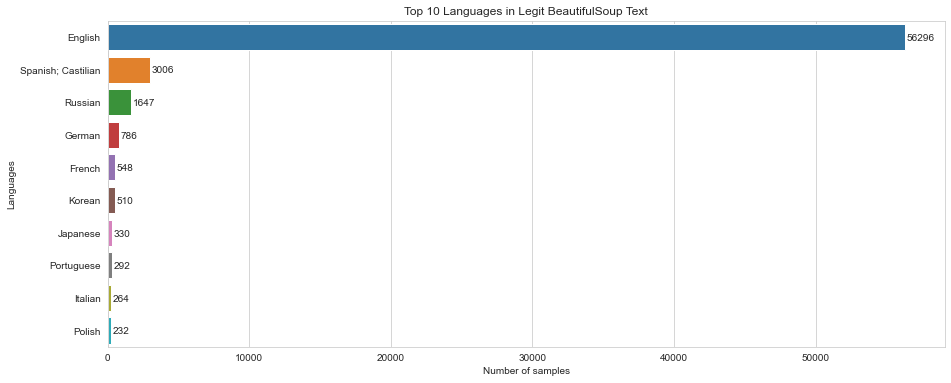

In [71]:
langs = BeautifulSoup_langs_legit[:10].index
values = BeautifulSoup_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit BeautifulSoup Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

In [72]:
html_langs_legit = legit_samples.html_text_language.value_counts()

# top 10 languages detected in html text
html_langs_legit[:10]

English                          66334
French                             168
Catalan; Valencian                 139
Spanish; Castilian                  52
Estonian                            38
Romanian; Moldavian; Moldovan       37
Polish                              25
Italian                             18
Welsh                               17
German                              15
Name: html_text_language, dtype: int64

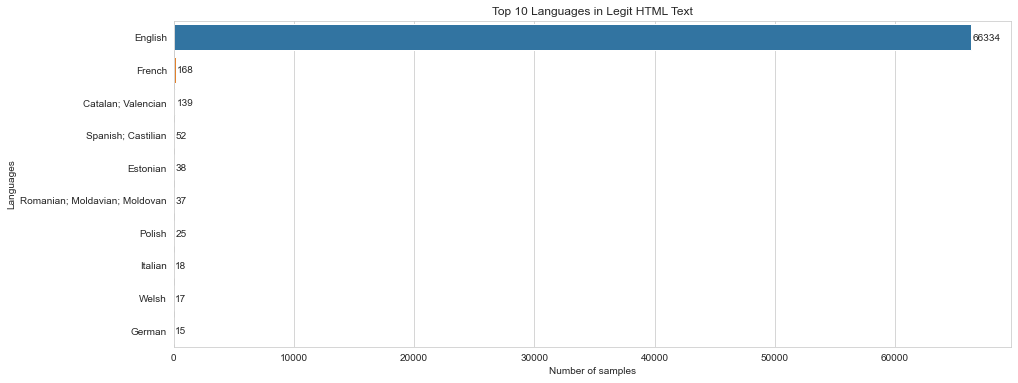

In [73]:
langs = html_langs_legit[:10].index
values = html_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit HTML Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


<hr></hr>

<a id='66' /> 
<h2>2.6 SSL Distribution</h2>

In [74]:
legit_samples.SSL.value_counts()

True     57670
False     9294
Name: SSL, dtype: int64

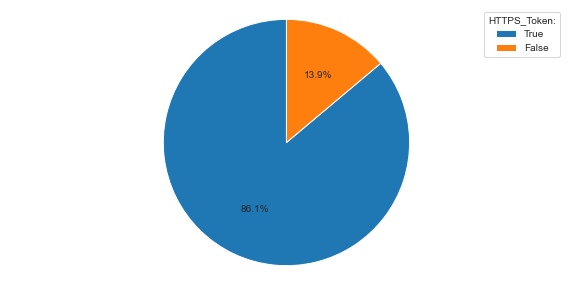

In [75]:
sizes = legit_samples.SSL.value_counts().values 
labels= legit_samples.SSL.value_counts().index 
fig=plt.figure(figsize=(10, 5))
plt.pie(sizes, startangle = 90, autopct = '%1.1f%%')
plt.legend(labels, title = 'HTTPS_Token:')
plt.axis('equal')

plt.show()

<hr></hr>

<a id='77' /> 
<h2>2.7 Top 10 TLD & Domains</h2>

In [76]:
legit_samples.Domain.value_counts()[:10]

force                39
amazon               36
google               34
practicaldatacore    23
ebay                 23
auth0                20
instructure          19
yelp                 16
olx                  14
sirsi                13
Name: Domain, dtype: int64

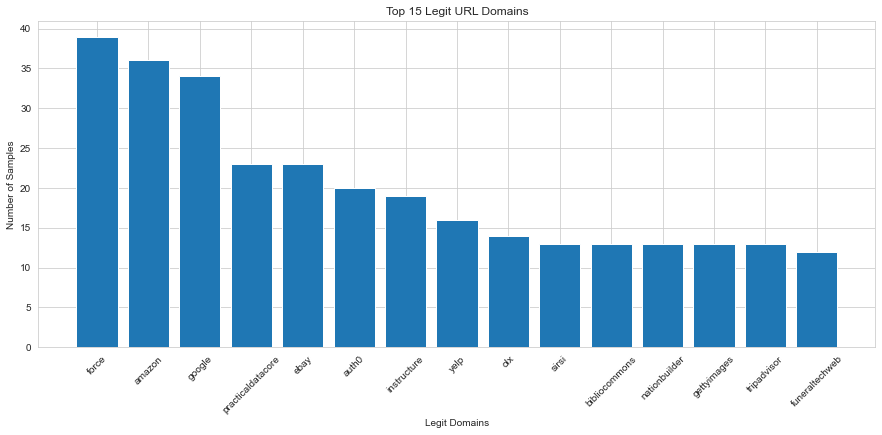

In [77]:
domains = legit_samples.Domain.value_counts()[:15].index
counts = legit_samples.Domain.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(domains, counts)

# Add labels and title
plt.xlabel("Legit Domains")
plt.ylabel("Number of Samples")
plt.title("Top 15 Legit URL Domains")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [78]:
legit_samples.TLD.value_counts()[:10]

com       47611
org        5782
net        2367
ru         1164
edu         920
co.uk       626
de          619
gov         461
it          274
com.au      274
Name: TLD, dtype: int64

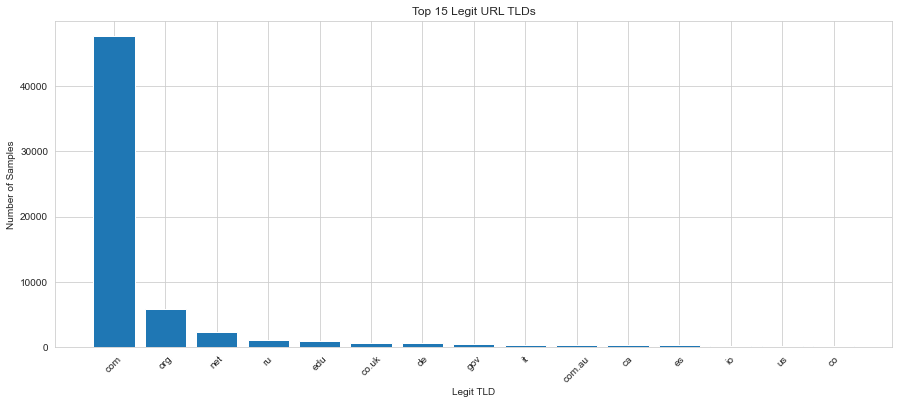

In [79]:
tlds = legit_samples.TLD.value_counts()[:15].index
counts = legit_samples.TLD.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(tlds, counts)

# Add labels and title
plt.xlabel("Legit TLD")
plt.ylabel("Number of Samples")
plt.title("Top 15 Legit URL TLDs")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<hr></hr>

<a id='88' /> 
<h2>2.8 URL Length Stats</h2>

In [80]:
print('Legit URL average length:', round(legit_samples.URL.str.len().sum()/sum(legit_samples.URL.notnull()), 4))
print('Legit URL min length:', legit_samples.URL.str.len().min())
print('Legit URL max length:', legit_samples.URL.str.len().max())
print('Legit URL median length:', legit_samples.URL.str.len().median())

Legit URL average length: 45.8047
Legit URL min length: 13
Legit URL max length: 2897
Legit URL median length: 33.0


<hr></hr>

<a id='99' /> 
<h2>2.9 Top 10 FLD & Subdomains</h2>

In [81]:
legit_samples.iloc[:, 4:9].head(10)

,URL,TLD,Domain,FLD,Subdomain
0,https://www.google.com/?gws_rd=ssl,com,google,google.com,www
1,https://www.yelp.es/madrid,es,yelp,yelp.es,www
2,https://www.fandom.com/,com,fandom,fandom.com,www
3,https://www.msn.com/es-es/,com,msn,msn.com,www
4,https://www.medicalnewstoday.com/,com,medicalnewstoday,medicalnewstoday.com,www
5,https://quizlet.com/,com,quizlet,quizlet.com,None
6,https://www.urbandictionary.com/,com,urbandictionary,urbandictionary.com,www
7,https://giphy.com/,com,giphy,giphy.com,None
8,https://www.youtube.com/,com,youtube,youtube.com,www
9,https://stackexchange.com/,com,stackexchange,stackexchange.com,None


In [82]:
print('the number of unique fld:', len(legit_samples.FLD.unique()))
legit_samples.FLD.value_counts()[:20]

the number of unique fld: 61990


force.com                39
practicaldatacore.com    23
auth0.com                20
instructure.com          19
bibliocommons.com        13
sirsi.net                13
nationbuilder.com        13
funeraltechweb.com       12
mgmresorts.com           10
secureserver.net         10
google.com                9
smarthub.coop             9
myguestaccount.com        9
microsoft.com             9
mykajabi.com              7
amazon.com                7
intuit.com                7
oracle.com                7
netsuite.com              7
okta.com                  7
Name: FLD, dtype: int64

In [83]:
print('the number of unique subdomains:', len(legit_samples.Subdomain.unique()))
legit_samples.Subdomain.value_counts()[:20]

the number of unique subdomains: 2188


www          38298
app            484
login          407
secure         284
my             270
account        254
es             149
shop           142
auth           130
myaccount      127
accounts       126
members        126
www2           107
sso             92
store           83
portal          58
member          57
passport        56
dashboard       53
online          50
Name: Subdomain, dtype: int64

In [84]:
legit_samples.iloc[:, 4:9].describe()

,URL,TLD,Domain,FLD,Subdomain
count,66964,66946,66946,66946,45313
unique,66447,505,61184,61989,2187
top,https://www.varsitytutors.com/login,com,force,force.com,www
freq,3,47611,39,39,38298
